In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification, SquaredClassification
from block_analysis import *
from derivation import get_hessian_grad_block, block_norm

## Helpers

In [2]:
def get_model_ds_loss():    
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = LinearClassification(out_dim)
    return model, ds, loss_fn

## Params

In [3]:
# Model
mode = "linear"
bias = False
nlayer = 4
inp_dim = 10 
out_dim = 10
hid_dim = 10

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 1

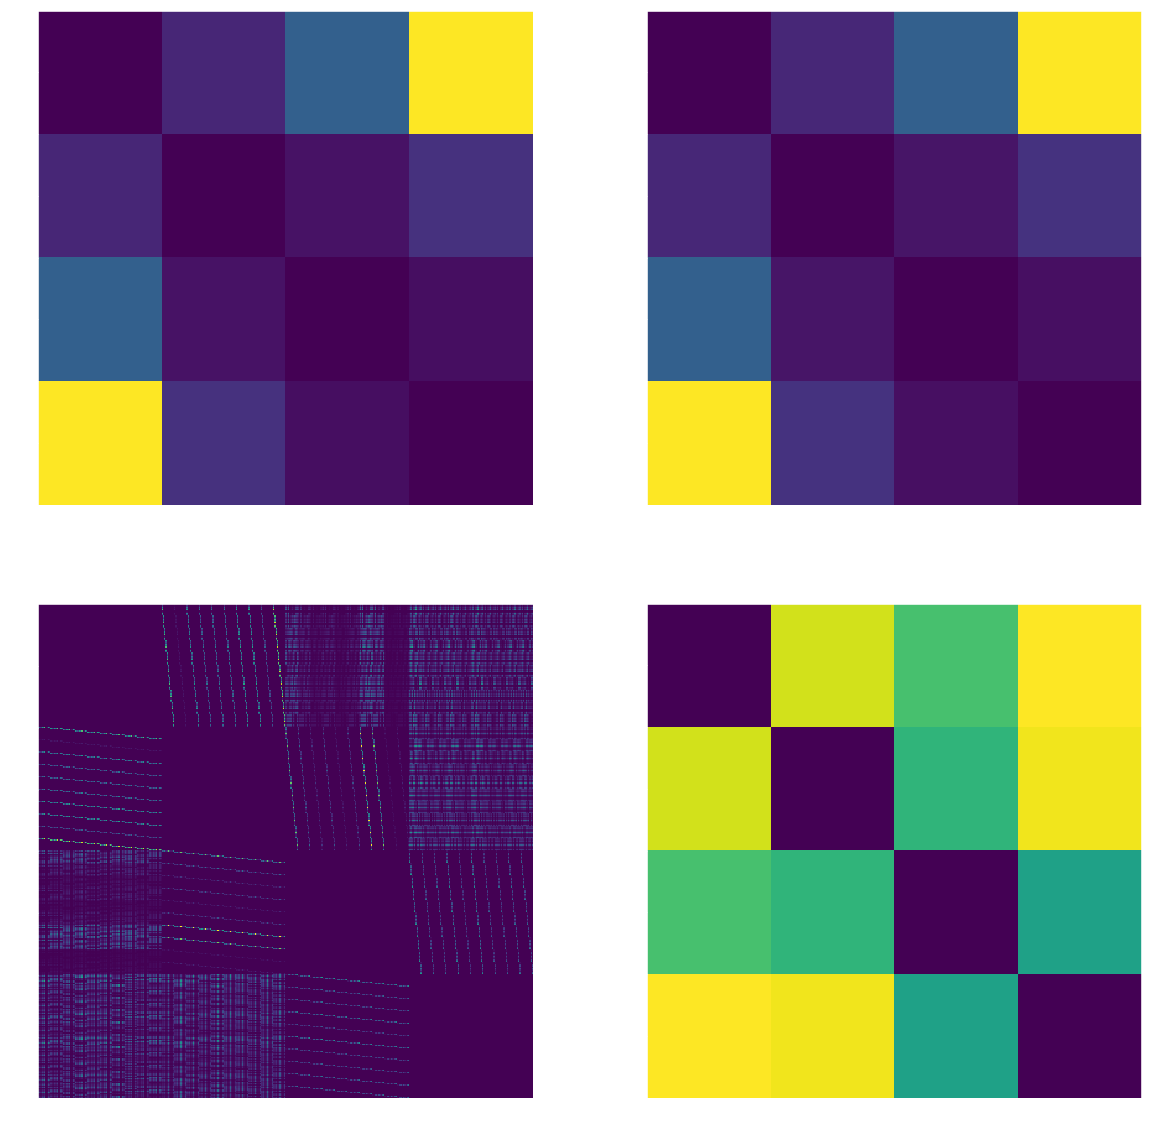

In [4]:
model, ds, loss_fn = get_model_ds_loss()
H_ = block_hessian(model, ds, loss_fn, lr=1)
H, grads, BH = get_hessian_grad_block(model, ds, loss_fn)
HBN = block_norm(H, grads)

fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0,0].imshow(H_.abs())
ax[0,1].imshow(BH.abs())
ax[1,0].imshow(H.abs())
ax[1,1].imshow(HBN.abs())

In [12]:
BH.cuda() / H_

tensor([[-0.0000,  1.0002,  0.9982,  1.0016],
        [ 1.0002, -0.0000,  1.0565,  1.0146],
        [ 0.9982,  1.0565, -0.0000,  1.0287],
        [ 1.0016,  1.0146,  1.0287, -0.0000]], device='cuda:0')